In [ ]:
#default_exp data.external

In [ ]:
#export
from fastai2.torch_basics import *

# External data
> Helper functions to download the fastai datasets

 A complete list of datasets that are available by default isnide the library are: 

**Main datasets**:
1.    **ADULT_SAMPLE**: A small of the [adults dataset](https://archive.ics.uci.edu/ml/datasets/Adult) to  predict whether income exceeds $50K/yr based on census data. 
-    **BIWI_SAMPLE**: A [BIWI kinect headpose database](https://www.kaggle.com/kmader/biwi-kinect-head-pose-database). The dataset contains over 15K images of 20 people (6 females and 14 males - 4 people were recorded twice). For each frame, a depth image, the corresponding rgb image (both 640x480 pixels), and the annotation is provided. The head pose range covers about +-75 degrees yaw and +-60 degrees pitch. 
1.    **CIFAR**: The famous [cifar-10](https://www.cs.toronto.edu/~kriz/cifar.html) dataset which consists of 60000 32x32 colour images in 10 classes, with 6000 images per class.      
1.    **COCO_SAMPLE**: A sample of the [coco dataset](http://cocodataset.org/#home) for object detection. 
1.    **COCO_TINY**: A tiny version of the [coco dataset](http://cocodataset.org/#home) for object detection.
-    **HUMAN_NUMBERS**: A synthetic dataset consisting of human number counts in text such as one, two, three, four.. Useful for experimenting with Language Models.
-    **IMDB**: The full [IMDB sentiment analysis dataset](https://ai.stanford.edu/~amaas/data/sentiment/).          

-    **IMDB_SAMPLE**: A sample of the full [IMDB sentiment analysis dataset](https://ai.stanford.edu/~amaas/data/sentiment/). 
-    **ML_SAMPLE**: A movielens sample dataset for recommendation engines to recommend movies to users.            
-    **ML_100k**: The movielens 100k dataset for recommendation engines to recommend movies to users.             
-    **MNIST_SAMPLE**: A sample of the famous [MNIST dataset](http://yann.lecun.com/exdb/mnist/) consisting of handwritten digits.        
-    **MNIST_TINY**: A tiny version of the famous [MNIST dataset](http://yann.lecun.com/exdb/mnist/) consisting of handwritten digits.                   
-    **MNIST_VAR_SIZE_TINY**:  
-    **PLANET_SAMPLE**: A sample of the planets dataset from the Kaggle competition [Planet: Understanding the Amazon from Space](https://www.kaggle.com/c/planet-understanding-the-amazon-from-space).
-    **PLANET_TINY**: A tiny version  of the planets dataset from the Kaggle competition [Planet: Understanding the Amazon from Space](https://www.kaggle.com/c/planet-understanding-the-amazon-from-space) for faster experimentation and prototyping.
-    **IMAGENETTE**: A smaller version of the [imagenet dataset](http://www.image-net.org/) pronounced just like 'Imagenet', except with a corny inauthentic French accent. 
-    **IMAGENETTE_160**: The 160px version of the Imagenette dataset.      
-    **IMAGENETTE_320**: The 320px version of the Imagenette dataset. 
-    **IMAGEWOOF**: Imagewoof is a subset of 10 classes from Imagenet that aren't so easy to classify, since they're all dog breeds.
-    **IMAGEWOOF_160**: 160px version of the ImageWoof dataset.        
-    **IMAGEWOOF_320**: 320px version of the ImageWoof dataset.
-    **IMAGEWANG**: Imagewang contains Imagenette and Imagewoof combined, but with some twists that make it into a tricky semi-supervised unbalanced classification problem
-    **IMAGEWANG_160**: 160px version of Imagewang.        
-    **IMAGEWANG_320**: 320px version of Imagewang. 

**Kaggle competition datasets**:
1. **DOGS**: Image dataset consisting of dogs and cats images from [Dogs vs Cats kaggle competition](https://www.kaggle.com/c/dogs-vs-cats). 

**Image Classification datasets**:
1.    **CALTECH_101**: Pictures of objects belonging to 101 categories. About 40 to 800 images per category. Most categories have about 50 images. Collected in September 2003 by Fei-Fei Li, Marco Andreetto, and Marc 'Aurelio Ranzato.
1.    CARS: The [Cars dataset](https://ai.stanford.edu/~jkrause/cars/car_dataset.html) contains 16,185 images of 196 classes of cars.   
1.    **CIFAR_100**: The CIFAR-100 dataset consists of 60000 32x32 colour images in 100 classes, with 600 images per class.   
1.    **CUB_200_2011**: Caltech-UCSD Birds-200-2011 (CUB-200-2011) is an extended version of the CUB-200 dataset, with roughly double the number of images per class and new part location annotations
1.    **FLOWERS**: 17 category [flower dataset](http://www.robots.ox.ac.uk/~vgg/data/flowers/) by gathering images from various websites.
1.    **FOOD**:         
1.    **MNIST**: [MNIST dataset](http://yann.lecun.com/exdb/mnist/) consisting of handwritten digits.      
1.    **PETS**: A 37 category [pet dataset](https://www.robots.ox.ac.uk/~vgg/data/pets/) with roughly 200 images for each class.

**NLP datasets**:
1.    **AG_NEWS**: The AG News corpus consists of news articles from the AG’s corpus of news articles on the web pertaining to the 4 largest classes. The dataset contains 30,000 training and 1,900 testing examples for each class.
1.    **AMAZON_REVIEWS**: This dataset contains product reviews and metadata from Amazon, including 142.8 million reviews spanning May 1996 - July 2014.
1.    **AMAZON_REVIEWS_POLARITY**: Amazon reviews dataset for sentiment analysis.
1.    **DBPEDIA**: The DBpedia ontology dataset contains 560,000 training samples and 70,000 testing samples for each of 14 nonoverlapping classes from DBpedia. 
1.    **MT_ENG_FRA**: Machine translation dataset from English to French.
1.    **SOGOU_NEWS**: [The Sogou-SRR](http://www.thuir.cn/data-srr/) (Search Result Relevance) dataset was constructed to support researches on search engine relevance estimation and ranking tasks.
1.    **WIKITEXT**: The [WikiText language modeling dataset](https://blog.einstein.ai/the-wikitext-long-term-dependency-language-modeling-dataset/) is a collection of over 100 million tokens extracted from the set of verified Good and Featured articles on Wikipedia.  
1.    **WIKITEXT_TINY**: A tiny version of the WIKITEXT dataset.
1.    **YAHOO_ANSWERS**: YAHOO's question answers dataset.
1.    **YELP_REVIEWS**: The [Yelp dataset](https://www.yelp.com/dataset) is a subset of YELP businesses, reviews, and user data for use in personal, educational, and academic purposes
1.    **YELP_REVIEWS_POLARITY**: For sentiment classification on YELP reviews.


**Image localization datasets**:
1.    **BIWI_HEAD_POSE**: A [BIWI kinect headpose database](https://www.kaggle.com/kmader/biwi-kinect-head-pose-database). The dataset contains over 15K images of 20 people (6 females and 14 males - 4 people were recorded twice). For each frame, a depth image, the corresponding rgb image (both 640x480 pixels), and the annotation is provided. The head pose range covers about +-75 degrees yaw and +-60 degrees pitch. 
1.    **CAMVID**: Consists of driving labelled dataset for segmentation type models.
1.    **CAMVID_TINY**: A tiny camvid dataset for segmentation type models.
1.    **LSUN_BEDROOMS**: [Large-scale Image Dataset](https://arxiv.org/abs/1506.03365) using Deep Learning with Humans in the Loop
1.    **PASCAL_2007**: [Pascal 2007 dataset](http://host.robots.ox.ac.uk/pascal/VOC/voc2007/) to recognize objects from a number of visual object classes in realistic scenes.
1.    **PASCAL_2012**: [Pascal 2012 dataset](http://host.robots.ox.ac.uk/pascal/VOC/voc2012/) to recognize objects from a number of visual object classes in realistic scenes.

**Audio classification**:
1. **MACAQUES**: [7285 macaque coo calls](https://datadryad.org/stash/dataset/doi:10.5061/dryad.7f4p9) across 8 individuals from [Distributed acoustic cues for caller identity in macaque vocalization](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4806230).
2. **ZEBRA_FINCH**: [3405 zebra finch calls](https://ndownloader.figshare.com/articles/11905533/versions/1) classified [across 11 call types](https://link.springer.com/article/10.1007/s10071-015-0933-6). Additonal labels include name of individual making the vocalization and its age.

**Medical Imaging datasets**:
1. **SIIM_SMALL**: A smaller version of the [SIIM dataset](https://www.kaggle.com/c/siim-acr-pneumothorax-segmentation/overview) where the objective is to classify pneumothorax from a set of chest radiographic images.

**Pretrained models**:
1.    **OPENAI_TRANSFORMER**: The GPT2 Transformer pretrained weights.
1.    **WT103_FWD**: The WikiText-103 forward language model weights.
1.    **WT103_BWD**: The WikiText-103 backward language model weights.

To download any of the datasets or pretrained weights, simply run `untar_data` by passing any dataset name mentioned above like so: 

```python 
path = untar_data(URLs.PETS)
path.ls()

>> (#7393) [Path('/home/ubuntu/.fastai/data/oxford-iiit-pet/images/keeshond_34.jpg'),Path('/home/ubuntu/.fastai/data/oxford-iiit-pet/images/Siamese_178.jpg'),Path('/home/ubuntu/.fastai/data/oxford-iiit-pet/images/german_shorthaired_94.jpg'),Path('/home/ubuntu/.fastai/data/oxford-iiit-pet/images/Abyssinian_92.jpg'),Path('/home/ubuntu/.fastai/data/oxford-iiit-pet/images/basset_hound_111.jpg'),Path('/home/ubuntu/.fastai/data/oxford-iiit-pet/images/Russian_Blue_194.jpg'),Path('/home/ubuntu/.fastai/data/oxford-iiit-pet/images/staffordshire_bull_terrier_91.jpg'),Path('/home/ubuntu/.fastai/data/oxford-iiit-pet/images/Persian_69.jpg'),Path('/home/ubuntu/.fastai/data/oxford-iiit-pet/images/english_setter_33.jpg'),Path('/home/ubuntu/.fastai/data/oxford-iiit-pet/images/Russian_Blue_155.jpg')...]
```

To download model pretrained weights: 
```python 
path = untar_data(URLs.PETS)
path.ls()

>> (#2) [Path('/home/ubuntu/.fastai/data/wt103-bwd/itos_wt103.pkl'),Path('/home/ubuntu/.fastai/data/wt103-bwd/lstm_bwd.pth')]
```

## Config -

In [ ]:
# export
class Config:
    "Setup config at `~/.fastai` unless it exists already."
    config_path = Path(os.getenv('FASTAI_HOME', '~/.fastai')).expanduser()
    config_file = config_path/'config.yml'

    def __init__(self):
        self.config_path.mkdir(parents=True, exist_ok=True)
        if not self.config_file.exists(): self.create_config()
        self.d = self.load_config()

    def __getitem__(self,k):
        k = k.lower()
        if k not in self.d: k = k+'_path'
        return Path(self.d[k])

    def __getattr__(self,k):
        if k=='d': raise AttributeError
        return self[k]

    def __setitem__(self,k,v): self.d[k] = str(v)
    def __contains__(self,k): return k in self.d

    def load_config(self):
        "load and return config if version equals 2 in existing, else create new config."
        with open(self.config_file, 'r') as f:
            config = yaml.safe_load(f)
            if 'version' in config and config['version'] == 2: return config
            elif 'version' in config: self.create_config(config)
            else: self.create_config()
        return self.load_config()

    def create_config(self, cfg=None):
        "create new config with default paths and set `version` to 2."
        config = {'data_path':    str(self.config_path/'data'),
                  'archive_path': str(self.config_path/'archive'),
                  'storage_path': '/tmp',
                  'model_path':   str(self.config_path/'models'),
                  'version':      2}
        if cfg is not None:
            cfg['version'] = 2
            config = merge(config, cfg)
        self.save_file(config)

    def save(self): self.save_file(self.d)
    def save_file(self, config):
        "save config file at default config location `~/.fastai/config.yml`."
        with self.config_file.open('w') as f: yaml.dump(config, f, default_flow_style=False)

If a config file doesn't exist already, it is always created at `~/.fastai/config.yml` location by default whenever an instance of the `Config` class is created. Here is a quick example to explain: 

In [ ]:
config_file = Path("~/.fastai/config.yml").expanduser()
if config_file.exists(): os.remove(config_file)
assert not config_file.exists()

config = Config()
assert config_file.exists()

The config is now available as `config.d`:

In [ ]:
config.d

{'archive_path': '/home/jhoward/.fastai/archive',
 'data_path': '/home/jhoward/.fastai/data',
 'model_path': '/home/jhoward/.fastai/models',
 'storage_path': '/tmp',
 'version': 2}

As can be seen, this is a basic config file that consists of `data_path`, `model_path`, `storage_path` and `archive_path`. 
All future downloads occur at the paths defined in the config file based on the type of download. For example, all future fastai datasets are downloaded to the `data_path` while all pretrained model weights are download to `model_path` unless the default download location is updated.

In [ ]:
#hide
config = Config()
config_path = config.config_path
config_file,config_bak = config_path/'config.yml',config_path/'config.yml.bak'
config_file,config_bak

(Path('/home/jhoward/.fastai/config.yml'),
 Path('/home/jhoward/.fastai/config.yml.bak'))

In [ ]:
#hide
#This cell is just to make the config file compatible with current fastai
# TODO: make this a method that auto-runs as needed
if 'data_archive_path' not in config:
    config['data_archive_path'] = config.data_path
    config.save()

Please note that it is possible to update the default path locations in the config file. Let's first create a backup of the config file, then update the config to show the changes and re update the new config with the backup file. 

In [ ]:
if config_file.exists(): shutil.move(config_file, config_bak)
config['archive_path'] = Path(".")
config.save()

In [ ]:
config = Config()
config.d

{'archive_path': '.',
 'data_archive_path': '/home/jhoward/.fastai/data',
 'data_path': '/home/jhoward/.fastai/data',
 'model_path': '/home/jhoward/.fastai/models',
 'storage_path': '/tmp',
 'version': 2}

The `archive_path` has been updated to `"."`. Now let's remove any updates we made to Config file that we made for the purpose of this example. 

In [ ]:
if config_bak.exists(): shutil.move(config_bak, config_file)
config = Config()
config.d

{'archive_path': '/home/jhoward/.fastai/archive',
 'data_archive_path': '/home/jhoward/.fastai/data',
 'data_path': '/home/jhoward/.fastai/data',
 'model_path': '/home/jhoward/.fastai/models',
 'storage_path': '/tmp',
 'version': 2}

## URLs -

In [ ]:
#export
class URLs():
    "Global constants for dataset and model URLs."
    LOCAL_PATH = Path.cwd()
    URL = 'http://files.fast.ai/data/examples/'
    MDL = 'http://files.fast.ai/models/'
    S3 = 'https://s3.amazonaws.com/fast-ai-'

    S3_IMAGE    = f'{S3}imageclas/'
    S3_IMAGELOC = f'{S3}imagelocal/'
    S3_AUDI     = f'{S3}audio/'
    S3_NLP      = f'{S3}nlp/'
    S3_COCO     = f'{S3}coco/'
    S3_MODEL    = f'{S3}modelzoo/'

    # main datasets
    ADULT_SAMPLE        = f'{URL}adult_sample.tgz'
    BIWI_SAMPLE         = f'{URL}biwi_sample.tgz'
    CIFAR               = f'{URL}cifar10.tgz'
    COCO_SAMPLE         = f'{S3_COCO}coco_sample.tgz'
    COCO_TINY           = f'{URL}coco_tiny.tgz'
    HUMAN_NUMBERS       = f'{URL}human_numbers.tgz'
    IMDB                = f'{S3_NLP}imdb.tgz'
    IMDB_SAMPLE         = f'{URL}imdb_sample.tgz'
    ML_SAMPLE           = f'{URL}movie_lens_sample.tgz'
    ML_100k             = 'http://files.grouplens.org/datasets/movielens/ml-100k.zip'
    MNIST_SAMPLE        = f'{URL}mnist_sample.tgz'
    MNIST_TINY          = f'{URL}mnist_tiny.tgz'
    MNIST_VAR_SIZE_TINY = f'{S3_IMAGE}mnist_var_size_tiny.tgz'
    PLANET_SAMPLE       = f'{URL}planet_sample.tgz'
    PLANET_TINY         = f'{URL}planet_tiny.tgz'
    IMAGENETTE          = f'{S3_IMAGE}imagenette2.tgz'
    IMAGENETTE_160      = f'{S3_IMAGE}imagenette2-160.tgz'
    IMAGENETTE_320      = f'{S3_IMAGE}imagenette2-320.tgz'
    IMAGEWOOF           = f'{S3_IMAGE}imagewoof2.tgz'
    IMAGEWOOF_160       = f'{S3_IMAGE}imagewoof2-160.tgz'
    IMAGEWOOF_320       = f'{S3_IMAGE}imagewoof2-320.tgz'
    IMAGEWANG           = f'{S3_IMAGE}imagewang.tgz'
    IMAGEWANG_160       = f'{S3_IMAGE}imagewang-160.tgz'
    IMAGEWANG_320       = f'{S3_IMAGE}imagewang-320.tgz'

    # kaggle competitions download dogs-vs-cats -p {DOGS.absolute()}
    DOGS = f'{URL}dogscats.tgz'

    # image classification datasets
    CALTECH_101  = f'{S3_IMAGE}caltech_101.tgz'
    CARS         = f'{S3_IMAGE}stanford-cars.tgz'
    CIFAR_100    = f'{S3_IMAGE}cifar100.tgz'
    CUB_200_2011 = f'{S3_IMAGE}CUB_200_2011.tgz'
    FLOWERS      = f'{S3_IMAGE}oxford-102-flowers.tgz'
    FOOD         = f'{S3_IMAGE}food-101.tgz'
    MNIST        = f'{S3_IMAGE}mnist_png.tgz'
    PETS         = f'{S3_IMAGE}oxford-iiit-pet.tgz'

    # NLP datasets
    AG_NEWS                 = f'{S3_NLP}ag_news_csv.tgz'
    AMAZON_REVIEWS          = f'{S3_NLP}amazon_review_full_csv.tgz'
    AMAZON_REVIEWS_POLARITY = f'{S3_NLP}amazon_review_polarity_csv.tgz'
    DBPEDIA                 = f'{S3_NLP}dbpedia_csv.tgz'
    MT_ENG_FRA              = f'{S3_NLP}giga-fren.tgz'
    SOGOU_NEWS              = f'{S3_NLP}sogou_news_csv.tgz'
    WIKITEXT                = f'{S3_NLP}wikitext-103.tgz'
    WIKITEXT_TINY           = f'{S3_NLP}wikitext-2.tgz'
    YAHOO_ANSWERS           = f'{S3_NLP}yahoo_answers_csv.tgz'
    YELP_REVIEWS            = f'{S3_NLP}yelp_review_full_csv.tgz'
    YELP_REVIEWS_POLARITY   = f'{S3_NLP}yelp_review_polarity_csv.tgz'

    # Image localization datasets
    BIWI_HEAD_POSE     = f"{S3_IMAGELOC}biwi_head_pose.tgz"
    CAMVID             = f'{S3_IMAGELOC}camvid.tgz'
    CAMVID_TINY        = f'{URL}camvid_tiny.tgz'
    LSUN_BEDROOMS      = f'{S3_IMAGE}bedroom.tgz'
    PASCAL_2007        = f'{S3_IMAGELOC}pascal_2007.tgz'
    PASCAL_2012        = f'{S3_IMAGELOC}pascal_2012.tgz'

    # Audio classification datasets
    MACAQUES           = 'https://storage.googleapis.com/ml-animal-sounds-datasets/macaques.zip'
    ZEBRA_FINCH        = 'https://storage.googleapis.com/ml-animal-sounds-datasets/zebra_finch.zip'

    # Medical Imaging datasets
    #SKIN_LESION        = f'{S3_IMAGELOC}skin_lesion.tgz'
    SIIM_SMALL         = f'{S3_IMAGELOC}siim_small.tgz'

    #Pretrained models
    OPENAI_TRANSFORMER = f'{S3_MODEL}transformer.tgz'
    WT103_FWD          = f'{S3_MODEL}wt103-fwd.tgz'
    WT103_BWD          = f'{S3_MODEL}wt103-bwd.tgz'

    def path(url='.', c_key='archive'):
        "Return local path where to download based on `c_key`"
        fname = url.split('/')[-1]
        local_path = URLs.LOCAL_PATH/('models' if c_key=='models' else 'data')/fname
        if local_path.exists(): return local_path
        return Config()[c_key]/fname

The default local path is at `~/.fastai/archive/` but this can be updated by passing a different `c_key`. Note: `c_key` should be one of `'archive_path', 'data_archive_path', 'data_path', 'model_path', 'storage_path'`.

In [ ]:
url = URLs.PETS
local_path = URLs.path(url)
test_eq(local_path.parent, Config()['archive']); 
local_path

Path('/home/jhoward/.fastai/archive/oxford-iiit-pet.tgz')

In [ ]:
local_path = URLs.path(url, c_key='model')
test_eq(local_path.parent, Config()['model'])
local_path

Path('/home/jhoward/.fastai/models/oxford-iiit-pet.tgz')

## Downloading

In [ ]:
# export
def download_url(url, dest, overwrite=False, pbar=None, show_progress=True, chunk_size=1024*1024,
                 timeout=4, retries=5):
    "Download `url` to `dest` unless it exists and not `overwrite`"
    if os.path.exists(dest) and not overwrite: return

    s = requests.Session()
    s.mount('http://',requests.adapters.HTTPAdapter(max_retries=retries))
    # additional line to identify as a firefox browser, see fastai/#2438
    s.headers.update({'User-Agent': 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:71.0) Gecko/20100101 Firefox/71.0'})
    u = s.get(url, stream=True, timeout=timeout)
    try: file_size = int(u.headers["Content-Length"])
    except: show_progress = False

    with open(dest, 'wb') as f:
        nbytes = 0
        if show_progress: pbar = progress_bar(range(file_size), leave=False, parent=pbar)
        try:
            if show_progress: pbar.update(0)
            for chunk in u.iter_content(chunk_size=chunk_size):
                nbytes += len(chunk)
                if show_progress: pbar.update(nbytes)
                f.write(chunk)
        except requests.exceptions.ConnectionError as e:
            fname = url.split('/')[-1]
            data_dir = dest.parent
            print(f'\n Download of {url} has failed after {retries} retries\n'
                  f' Fix the download manually:\n'
                  f'$ mkdir -p {data_dir}\n'
                  f'$ cd {data_dir}\n'
                  f'$ wget -c {url}\n'
                  f'$ tar xf {fname}\n'
                  f' And re-run your code once the download is successful\n')

The `download_url` is a very handy function inside fastai! This function can be used to download any file from the internet to a location passed by `dest` argument of the function. It should not be confused, that this function can only be used to download fastai-files. That couldn't be further away from the truth. As an example, let's download the pets dataset from the actual source file: 

In [ ]:
fname = Path("./dog.jpg")
if fname.exists(): os.remove(fname)
url = "https://i.insider.com/569fdd9ac08a80bd448b7138?width=1100&format=jpeg&auto=webp"
download_url(url, fname)
assert fname.exists()

Let's confirm that the file was indeed downloaded correctly.

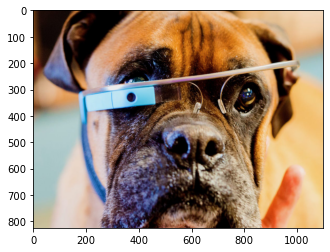

In [ ]:
from PIL import Image
im = Image.open(fname)
plt.imshow(im);

As can be seen, the file has been downloaded to the local path provided in `dest` argument. Calling the function again doesn't trigger a download since the file is already there. This can be confirmed by checking that the last modified time of the file that is downloaded doesn't get updated. 

In [ ]:
if fname.exists(): last_modified_time = os.path.getmtime(fname)
download_url(url, fname)
test_eq(os.path.getmtime(fname), last_modified_time)
if fname.exists(): os.remove(fname)

We can also use the `download_url` function to download the pet's dataset straight from the source by simply passing `https://www.robots.ox.ac.uk/~vgg/data/pets/data/images.tar.gz` in `url`. 

In [ ]:
# export
def download_data(url, fname=None, c_key='archive', force_download=False):
    "Download `url` to `fname`."
    fname = Path(fname or URLs.path(url, c_key=c_key))
    fname.parent.mkdir(parents=True, exist_ok=True)
    if not fname.exists() or force_download: download_url(url, fname, overwrite=force_download)
    return fname

The `download_data` is a convenience function and a wrapper outside `download_url` to download fastai files to the appropriate local path based on the `c_key`. 

If `fname` is None, it will default to the archive folder you have in your config file (or data, model if you specify a different `c_key`) followed by the last part of the url: for instance `URLs.MNIST_SAMPLE` is `http://files.fast.ai/data/examples/mnist_sample.tgz` and the default value for `fname` will be `~/.fastai/archive/mnist_sample.tgz`.

If `force_download=True`, the file is alwayd downloaded. Otherwise, it's only when the file doesn't exists that the download is triggered.

In [ ]:
#hide
try:
    test_eq(download_data(URLs.MNIST_SAMPLE), config.archive/'mnist_sample.tgz')
    test_eq(download_data(URLs.MNIST_TINY, fname=Path('mnist.tgz')), Path('mnist.tgz'))
finally: Path('mnist.tgz').unlink()

try:
    tst_model = config.model/'mnist_tiny.tgz'
    test_eq(download_data(URLs.MNIST_TINY, c_key='model'), tst_model)
    os.remove(tst_model)
finally:
    if tst_model.exists(): tst_model.unlink()

### Check datasets -

In [ ]:
#hide
from nbdev.imports import Config as NbdevConfig
__file__ = NbdevConfig().lib_path/'data'/'external.py'

In [ ]:
#export
def _get_check(url):
    "internal function to get the hash of the file at `url`."
    checks = json.load(open(Path(__file__).parent/'checks.txt', 'r'))
    return checks.get(url, None)

def _check_file(fname):
    "internal function to get the hash of the local file at `fname`."
    size = os.path.getsize(fname)
    with open(fname, "rb") as f: hash_nb = hashlib.md5(f.read(2**20)).hexdigest()
    return [size,hash_nb]

In [ ]:
#hide
test_eq(_get_check(URLs.MNIST_SAMPLE), _check_file(URLs.path(URLs.MNIST_SAMPLE)))
_get_check(URLs.MNIST_SAMPLE), _check_file(URLs.path(URLs.MNIST_SAMPLE))

([3214948, '2dbc7ec6f9259b583af0072c55816a88'],
 [3214948, '2dbc7ec6f9259b583af0072c55816a88'])

In [ ]:
_get_check(URLs.PASCAL_2007),_get_check(URLs.PASCAL_2012)

([1637796771, '433b4706eb7c42bd74e7f784e3fdf244'],
 [2618908000, 'd90e29e54a4c76c0c6fba8355dcbaca5'])

In [ ]:
#export
def _add_check(url, fname):
    "Internal function to update the internal check file with `url` and check on `fname`."
    checks = json.load(open(Path(__file__).parent/'checks.txt', 'r'))
    checks[url] = _check_file(fname)
    json.dump(checks, open(Path(__file__).parent/'checks.txt', 'w'), indent=2)

### Extract

In [ ]:
#export
def file_extract(fname, dest=None):
    "Extract `fname` to `dest` using `tarfile` or `zipfile`."
    if dest is None: dest = Path(fname).parent
    fname = str(fname)
    if   fname.endswith('gz'):  tarfile.open(fname, 'r:gz').extractall(dest)
    elif fname.endswith('zip'): zipfile.ZipFile(fname     ).extractall(dest)
    else: raise Exception(f'Unrecognized archive: {fname}')

`file_extract` is used by default in `untar_data` to decompress the downloaded file. 

In [ ]:
#export
def _try_from_storage(dest, storage):
    "an internal function to create symbolic links for files from `storage` to `dest` if `storage` exists"
    if not storage.exists(): return
    os.makedirs(dest, exist_ok=True)
    for f in storage.glob('*'): os.symlink(f, dest/f.name, target_is_directory=f.is_dir())

In [ ]:
#hide
with tempfile.TemporaryDirectory() as d:
    with tempfile.TemporaryDirectory() as d2:
        d,d2 = Path(d),Path(d2)
        for k in ['a', 'b', 'c']: os.makedirs(d/k)
        for k in ['d', 'e', 'f']: (d/k).touch()
        _try_from_storage(d2, d)
        for k in ['a', 'b', 'c']: 
            assert (d2/k).exists()
            assert (d2/k).is_dir()
        for k in ['d', 'e', 'f']: 
            assert (d2/k).exists()
            assert (d2/k).is_file()

In [ ]:
#export
def newest_folder(path):
    "Return newest folder on path"
    list_of_paths = path.glob('*')
    return max(list_of_paths, key=lambda p: p.stat().st_ctime)

In [ ]:
#export
def rename_extracted(dest):
    "Rename file if different from dest"
    extracted = newest_folder(dest.parent)
    if not (extracted.name == dest.name): extracted.rename(dest)

let's rename the untar/unzip data if dest name is different from fname

In [ ]:
#export
def untar_data(url, fname=None, dest=None, c_key='data', force_download=False, extract_func=file_extract):
    "Download `url` to `fname` if `dest` doesn't exist, and un-tgz or unzip to folder `dest`."
    default_dest = URLs.path(url, c_key=c_key).with_suffix('')
    dest = default_dest if dest is None else Path(dest)/default_dest.name
    fname = Path(fname or URLs.path(url))
    if fname.exists() and _get_check(url) and _check_file(fname) != _get_check(url):
        print("A new version of this dataset is available, downloading...")
        force_download = True
    if force_download:
        if fname.exists(): os.remove(fname)
        if dest.exists(): shutil.rmtree(dest)
    if not dest.exists(): _try_from_storage(dest, URLs.path(url, c_key='storage').with_suffix(''))
    if not dest.exists():
        fname = download_data(url, fname=fname, c_key=c_key)
        if _get_check(url) and _check_file(fname) != _get_check(url):
            print(f"File downloaded is broken. Remove {fname} and try again.")
        extract_func(fname, dest.parent)
        rename_extracted(dest)
    return dest

`untar_data` is a very powerful convenience function to download files from `url` to `dest`. The `url` can be a default `url` from the `URLs` class or a custom url. If `dest` is not passed, files are downloaded at the `default_dest` which defaults to `~/.fastai/data/`.

This convenience function extracts the downloaded files to `dest` by default. In order, to simply download the files without extracting, pass the `noop` function as `extract_func`. 

Note, it is also possible to pass a custom `extract_func` to `untar_data` if the filetype doesn't end with `.tgz` or `.zip`. The `gzip` and `zip` files are supported by default and there is no need to pass custom `extract_func` for these type of files. 

Internally, if files are not available at `fname` location already which defaults to `~/.fastai/archive/`, the files get downloaded at `~/.fastai/archive` and are then extracted at `dest` location. If no `dest` is passed the `default_dest` to download the files is `~/.fastai/data`. If files are already available at the `fname` location but not available then a symbolic link is created for each file from `fname` location to `dest`.

Also, if `force_download` is set to `True`, files are re downloaded even if they exist. 

In [ ]:
from tempfile import TemporaryDirectory

In [ ]:
test_eq(untar_data(URLs.MNIST_SAMPLE), config.data/'mnist_sample')

with TemporaryDirectory() as d:
    d = Path(d)
    dest = untar_data(URLs.MNIST_TINY, fname='mnist_tiny.tgz', dest=d, force_download=True)
    assert Path('mnist_tiny.tgz').exists()
    assert (d/'mnist_tiny').exists()
    os.unlink('mnist_tiny.tgz')

#Test c_key
tst_model = config.model/'mnist_sample'
test_eq(untar_data(URLs.MNIST_SAMPLE, c_key='model'), tst_model)
assert not tst_model.with_suffix('.tgz').exists() #Archive wasn't downloaded in the models path
assert (config.archive/'mnist_sample.tgz').exists() #Archive was downloaded there
shutil.rmtree(tst_model)

Sometimes the extracted folder does not have the same name as the downloaded file.

In [ ]:
#test fname!=dest
with TemporaryDirectory() as d:
    d = Path(d)
    untar_data(URLs.MNIST_TINY, fname='mnist_tiny.tgz', dest=d, force_download=True)
    Path('mnist_tiny.tgz').rename('nims_tini.tgz')
    p = Path('nims_tini.tgz')
    dest = Path('nims_tini')
    assert p.exists()
    file_extract(p, dest.parent)
    rename_extracted(dest)
    p.unlink()
    shutil.rmtree(dest)

In [ ]:
#hide
#Check all URLs are in the checks.txt file and match for downloaded archives
_whitelist = "MDL LOCAL_PATH URL WT103_BWD WT103_FWD".split()
checks = json.load(open(Path(__file__).parent/'checks.txt', 'r'))
for d in dir(URLs): 
    if d.upper() == d and not d.startswith("S3") and not d in _whitelist: 
        url = getattr(URLs, d)
        assert url in checks,f"""{d} is not in the check file for all URLs.
To fix this, you need to run the following code in this notebook before making a PR (there is a commented cell for this below):
url = URLs.{d}
untar_data(url, force_download=True)
_add_check(url, URLs.path(url))
"""
        f = URLs.path(url)
        if f.exists():
            assert checks[url] == _check_file(f),f"""The log we have for {d} in checks does not match the actual archive.
To fix this, you need to run the following code in this notebook before making a PR (there is a commented cell for this below):
url = URLs.{d}
_add_check(url, URLs.path(url))
"""

## Export -

In [ ]:
#hide
from nbdev.export import notebook2script
notebook2script()

Converted 00_torch_core.ipynb.
Converted 01_layers.ipynb.
Converted 02_data.load.ipynb.
Converted 03_data.core.ipynb.
Converted 04_data.external.ipynb.
Converted 05_data.transforms.ipynb.
Converted 06_data.block.ipynb.
Converted 07_vision.core.ipynb.
Converted 08_vision.data.ipynb.
Converted 09_vision.augment.ipynb.
Converted 09b_vision.utils.ipynb.
Converted 09c_vision.widgets.ipynb.
Converted 10_tutorial.pets.ipynb.
Converted 11_vision.models.xresnet.ipynb.
Converted 12_optimizer.ipynb.
Converted 13_callback.core.ipynb.
Converted 13a_learner.ipynb.
Converted 13b_metrics.ipynb.
Converted 14_callback.schedule.ipynb.
Converted 14a_callback.data.ipynb.
Converted 15_callback.hook.ipynb.
Converted 15a_vision.models.unet.ipynb.
Converted 16_callback.progress.ipynb.
Converted 17_callback.tracker.ipynb.
Converted 18_callback.fp16.ipynb.
Converted 18a_callback.training.ipynb.
Converted 19_callback.mixup.ipynb.
Converted 20_interpret.ipynb.
Converted 20a_distributed.ipynb.
Converted 21_vision.l